### Application: Audio Signal Filtering  
Problem Statement: Filter the Audio Signal Captured in the presence of noise and improve the quality of sound  

Algorithm:  
1.  Record Audio Signal in the presence of noise ==> x[n]  
2.  Play the recorded signal x[n] and observe the quality of sound  
3.  Design FIR Low Pass Filter using MATLAB filter design Tool  
     Take Fpass = 4000Hz. Fstop = 6000Hs Fs = 44000  
4.   Filter the audio signal x[n]  
      i.e. Perform Linear Convolution of x[n] and h[n] ==>.  y[n]  
5.  Play the filtered signal [n] and observe the quality of sound  

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import sounddevice as sd
import warnings

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
fs, audio_data = wavfile.read('./../audios/sample.wav')
print("Sampling rate: ", fs)
print("Audio duration: ", audio_data.shape[0]/fs, "seconds")
print("No. of Samples: ", audio_data.shape[0])

Sampling rate:  48000
Audio duration:  4.98 seconds
No. of Samples:  239040


In [36]:
# playing the audio
print("Playing the original audio...")
sd.play(audio_data, fs)
sd.wait()

Playing the original audio...


In [4]:
# adding noise to the audio
noise = np.random.normal(0, 1, audio_data.shape)
noisy_signal = audio_data + noise

In [25]:
print("Playing the original signal with noise...")
sd.play(noisy_signal, fs)
sd.wait()

Playing the original signal with noise...


In [5]:
# save the noisy signal
wavfile.write('./../audios/noisy_signal.wav', fs, noisy_signal.astype(np.int16))

In [6]:
# Function to design FIR Low Pass Filter
def design_low_pass_filter(Fpass, Fstop, Fs):
    nyquist = 0.5 * Fs
    Fpass_normalized = Fpass / nyquist
    Fstop_normalized = Fstop / nyquist
    taps = 101  # Adjust the number of taps as needed
    coefficients = signal.firwin(taps, cutoff=Fpass_normalized, window="hamming")
    return coefficients

In [12]:
# Function to filter audio signal using linear convolution
def filter_audio_signal(x, h):
    # convert to 1D array
    x = np.array(x).flatten()
    h = np.array(h).flatten()
    y = np.convolve(x, h, mode="same")
    return y.astype(np.int16)

In [11]:
# Function to play audio
def play_audio(audio_data, fs):
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(audio_data)) / fs, audio_data)
    plt.title("Audio Signal")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [10]:
# Define parameters
file_path = './sample_with_noise.wav'  # Replace with the actual path to your audio file
Fpass = 4000  # Passband frequency in Hz
Fstop = 6000  # Stopband frequency in Hz
Fs = 44000  # Sampling frequency in Hz

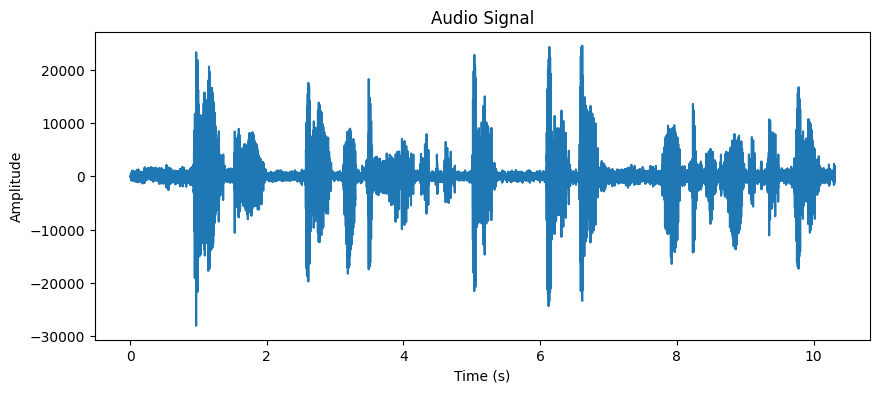

In [23]:
# Load the audio signal
play_audio(audio_data, fs)

In [9]:
# Design FIR Low Pass Filter
h = design_low_pass_filter(Fpass, Fstop, Fs)

# Filter the audio signal using linear convolution
filtered_audio = filter_audio_signal(audio_data, h)
play_audio(filtered_audio, fs)
wavfile.write("filtered_audio.wav", fs, filtered_audio)

(239040,)


NameError: name 'play_audio' is not defined

In [1]:
print("Playing the filtered signal...")
sd.play(filtered_audio, fs)
sd.wait()

Playing the filtered signal...


NameError: name 'sd' is not defined